In [2]:

!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 3.6 MB/s eta 0:00:00


In [1]:
import google.generativeai as genai



In [3]:
import os

# Set the API key
os.environ['GOOGLE_API_KEY'] = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'


In [4]:
# Retrieve the API key
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')


In [5]:
genai.configure(api_key=GOOGLE_API_KEY)


# Nouvelle section

In [6]:

for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)


models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-001
models/gemini-1.5-flash-latest
models/gemini-1.5-pro
models/gemini-1.5-pro-001
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [7]:
# Model Configuration
MODEL_CONFIG = {
  "temperature": 0.2,
  "top_p": 1,
  "top_k": 32,
  "max_output_tokens": 4096,
}

## Safety Settings of Model
safety_settings = [
  {
    "category": "HARM_CATEGORY_HARASSMENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_HATE_SPEECH",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  },
  {
    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
  }
]


In [8]:
model = genai.GenerativeModel(model_name = "gemini-pro-vision",
                              generation_config = MODEL_CONFIG,
                              safety_settings = safety_settings)

In [9]:
from pathlib import Path

def image_format(image_path):
    img = Path(image_path)

    if not img.exists():
        raise FileNotFoundError(f"Could not find image: {img}")

    image_parts = [
        {
            "mime_type": "image/png", ## Mime type are PNG - image/png. JPEG - image/jpeg. WEBP - image/webp
            "data": img.read_bytes()
        }
    ]
    return image_parts

In [10]:

def gemini_output(image_path, system_prompt, user_prompt):

    image_info = image_format(image_path)
    input_prompt= [system_prompt, image_info[0], user_prompt]
    response = model.generate_content(input_prompt)
    return response.text

In [11]:
# Install the required packages
!pip install pytesseract pdf2image pdfplumber opencv-python-headless pillow

# Install Tesseract-OCR
!apt-get update
!apt-get install -y tesseract-ocr

# Set the Tesseract-OCR path
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Import libraries
import cv2
import pytesseract
import numpy as np
from matplotlib import pyplot as plt
from pdf2image import convert_from_path
import pandas as pd
import re
import os
import math
from PIL import Image
import pdfplumber


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 76.4 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [917 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 https://ppa.launchpadcontent.net/

In [12]:
!pip install PyMuPDF


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 13.1 MB/s eta 0:00:00


In [13]:
import fitz
import os

# Get the current directory path
current_path = os.getcwd()

# Open the PDF file
pdf_document = "facture steg.pdf"
doc = fitz.open(pdf_document)

# Get the first page
first_page = doc[0]

# Iterate through the page's images
for img_index, img in enumerate(first_page.get_images(full=True)):
    xref = img[0]
    base_image = doc.extract_image(xref)
    image_bytes = base_image["image"]

    # Save the image in the current directory
    image_name = f"page1_image{img_index + 1}.png"
    image_path = os.path.join(current_path, image_name)
    with open(image_path, "wb") as image_file:
        image_file.write(image_bytes)

    print(f"Image {img_index + 1} saved as {image_path}")


Image 1 saved as /content/page1_image1.png


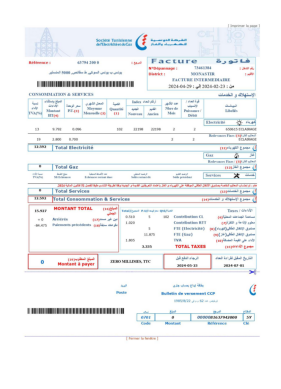

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the extracted image
image_filename = "/content/page1_image1.png"
image = Image.open(image_filename)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()


In [20]:
system_prompt = """
               You are a specialist in comprehending receipts.
               Input images in the form of receipts will be provided to you,
               and your task is to respond to questions based on the content of the input image.
               """

image_path = "/content/page1_image1.png"

user_prompt = "how much  the Montant à payer  in the image?"

gemini_output(image_path, system_prompt, user_prompt)

' The montant à payer is 0.'